In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print("images shape:%s" % str(digits.images.shape))
print("targets shape:%s" % str(digits.target.shape))

images shape:(1797, 8, 8)
targets shape:(1797,)


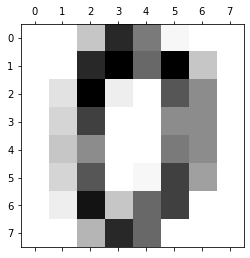

In [4]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])